In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import os
# import lazypredict
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, auc, roc_curve

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
df = pd.read_csv('/Users/mrbinit/Downloads/BankCustomerData.csv')

In [6]:
class EDA:

    def row(self,data):
        fig = make_subplots(rows=1, cols=2)
        fig.add_trace(go.Indicator(mode = "number", value = data.shape[0], number={'font':{'color': '#E58F65','size':100}}, title = {"text": "🧾 Rows<br><span style='font-size:0.8em;color:gray'>In the Dataframe</span>"}, domain = {'x': [0, 0.5], 'y': [0.6, 1]}))
        fig.add_trace(go.Indicator(mode = "number", value = data.shape[1], number={'font':{'color': '#E58F65','size':100}}, title = {"text": "⭕ Columns<br><span style='font-size:0.8em;color:gray'>In the Dataframe</span>"}, domain = {'x': [0.5, 1], 'y': [0, 0.4]}))
        fig.show()

    def border_msg(self,msg, indent=1, width=None, title=None):
        """Print message-box with optional title."""
        lines = msg.split('\n')
        space = " " * indent
        if not width:
            width = max(map(len, lines))
        box = f'╔{"═" * (width + indent * 2)}╗\n'
        if title:
            box += f'║{space}{title:<{width}}{space}║\n'
            box += f'║{space}{"-" * len(title):<{width}}{space}║\n'
        box += ''.join([f'║{space}{line:<{width}}{space}║\n' for line in lines])
        box += f'╚{"═" * (width + indent * 2)}╝'
        print('\033[92m'+'\033[1m')
        print(box)

    def distribution(self,x,title):
        plt.figure(figsize=(10,8))
        ax = sns.distplot(x, kde=False,bins=30)
        values = np.array([rec.get_height() for rec in ax.patches])
        norm = plt.Normalize(values.min(), values.max())
        colors = plt.cm.jet(norm(values))
        for rec, col in zip(ax.patches,colors):
            rec.set_color(col)
        plt.title(title, size=20, color='black')

    def run(self,df):

        self.row(df)
        if len(df)>0:

            object_df = df.select_dtypes('object').columns.tolist()
            int_df = df.select_dtypes('int').columns.tolist()
            bool_df = df.select_dtypes('bool').columns.tolist()
            float_df = df.select_dtypes('float').columns.tolist()

            if len(object_df)>0:

                print( '\033[1m'+"OBJECT TYPE")
                for col in object_df:
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    self.border_msg('There are {} unique values in {} column'.format(df[col].nunique(),col.upper()))
                    plt.figure(figsize=(10,5))
                    sns.countplot(y = col, data = df,
                                  order = df[col].value_counts().index)
                    plt.show()

            if len(int_df)>0:

                print('\033[1m'+"INT TYPE")
                for col in int_df:
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    self.border_msg('Average value is : {}'.format(df[col].mean()))
                    self.border_msg('Minumum value is : {}'.format(df[col].min()))
                    self.border_msg('Maximum value is : {}'.format(df[col].max()))
                    self.distribution(df[col],title=col)
                    if df[col].mean()>df[col].std():
                        print(self.border_msg("Normal distributed Data Located below mean"))

                    elif df[col].mean()<df[col].std():
                        print(self.border_msg("Normal distributed Data Located above mean"))
                    else:
                        self.border_msg("Mean Equals Std Dev - Distribution is normal")

                    fig = make_subplots(rows=1, cols=2)
                    fig.add_trace(go.Indicator(mode = "number", value = df[col].mean(), number={'font':{'color': '#E58F65','size':100}}, title = {"text": "📌 Mean<br><span style='font-size:0.8em;color:gray'></span>"}, domain = {'x': [0, 0.5], 'y': [0.6, 1]}))
                    fig.add_trace(go.Indicator(mode = "number", value = df[col].std(), number={'font':{'color': '#E58F65','size':100}}, title = {"text": "🖇 Standart dev<br><span style='font-size:0.8em;color:gray'></span>"}, domain = {'x': [0.5, 1], 'y': [0, 0.4]}))
                    fig.show()
                    plt.show()


            if len(bool_df)>0:

                print('\033[1m'+"BOOL TYPE")
                for col in bool_df:
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    plt.figure(figsize=(10,5))
                    sns.countplot(y = col, data = df,
                                  order = df[col].value_counts().index)
                    plt.show()

            if len(float_df)>0:

                print('\033[1m'+"FLOAT TYPE")
                for col in float_df:
                    for col in int_df:
                        self.distribution(df[col],title=col)
                        if df[col].mean()>df[col].std():
                            print(self.border_msg("Normal distributed Data Located below mean"))

                        elif df[col].mean()<df[col].std():
                            print(self.border_msg("Normal distributed Data Located above mean"))
                        else:
                            self.border_msg("Mean Equals Std Dev - Distribution is normal")

/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning:

urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



OBJECT TYPE

╔═══════════════════════════════════════════════════════╗
║                          JOB                          ║
╚═══════════════════════════════════════════════════════╝

╔══════════════════════════════════════════╗
║ There are 12 unique values in JOB column ║
╚══════════════════════════════════════════╝


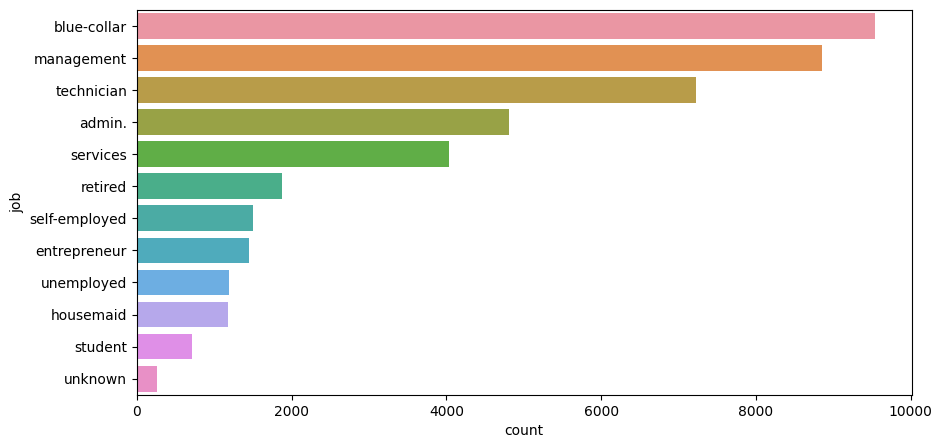


╔═══════════════════════════════════════════════════════════╗
║                          MARITAL                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 3 unique values in MARITAL column ║
╚═════════════════════════════════════════════╝


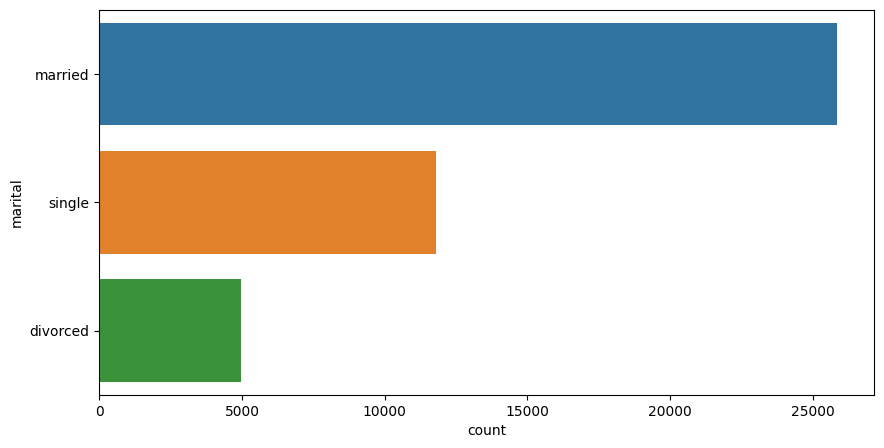


╔═════════════════════════════════════════════════════════════╗
║                          EDUCATION                          ║
╚═════════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════════════╗
║ There are 4 unique values in EDUCATION column ║
╚═══════════════════════════════════════════════╝


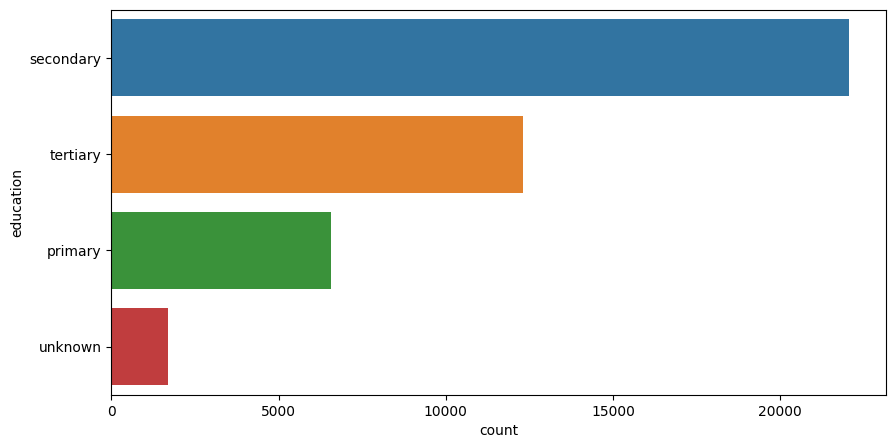


╔═══════════════════════════════════════════════════════════╗
║                          DEFAULT                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 2 unique values in DEFAULT column ║
╚═════════════════════════════════════════════╝


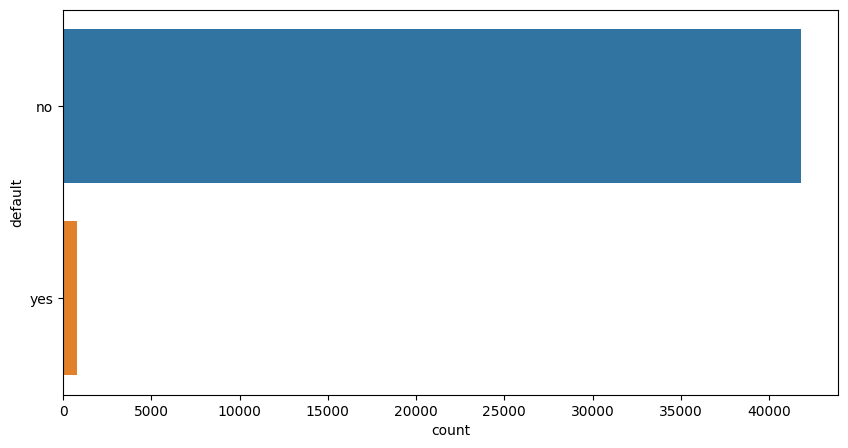


╔═══════════════════════════════════════════════════════════╗
║                          HOUSING                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 2 unique values in HOUSING column ║
╚═════════════════════════════════════════════╝


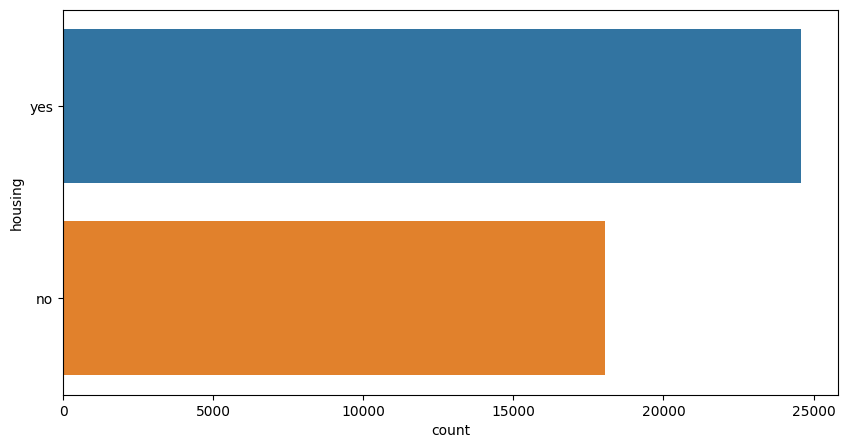


╔════════════════════════════════════════════════════════╗
║                          LOAN                          ║
╚════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════╗
║ There are 2 unique values in LOAN column ║
╚══════════════════════════════════════════╝


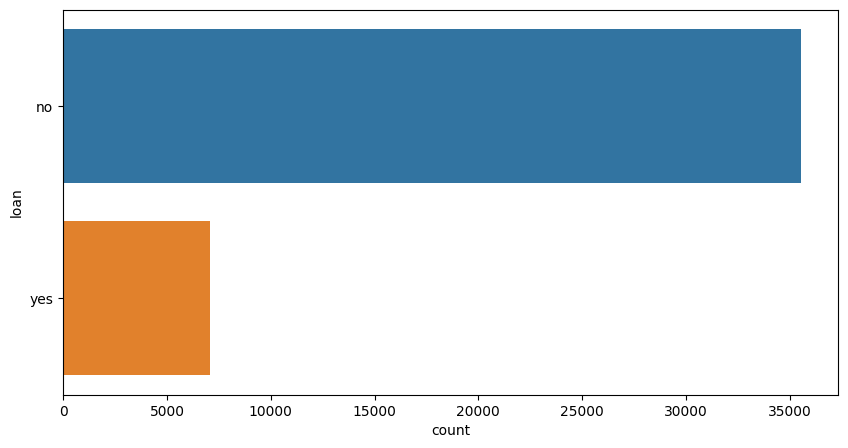


╔═══════════════════════════════════════════════════════════╗
║                          CONTACT                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 3 unique values in CONTACT column ║
╚═════════════════════════════════════════════╝


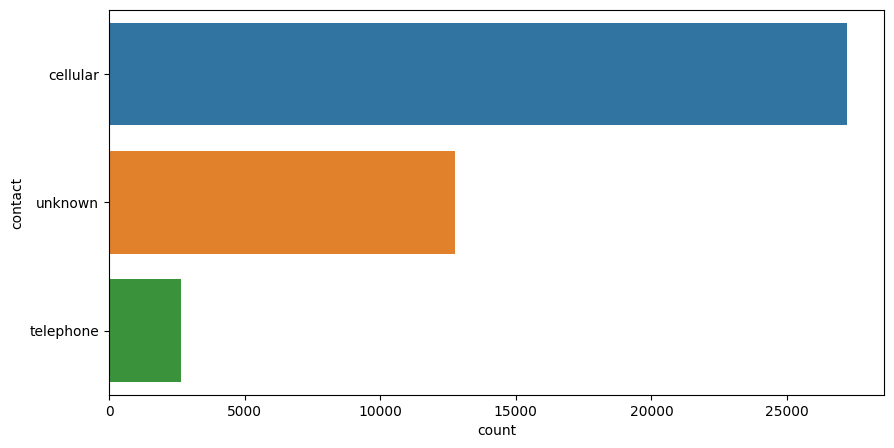


╔═════════════════════════════════════════════════════════╗
║                          MONTH                          ║
╚═════════════════════════════════════════════════════════╝

╔════════════════════════════════════════════╗
║ There are 12 unique values in MONTH column ║
╚════════════════════════════════════════════╝


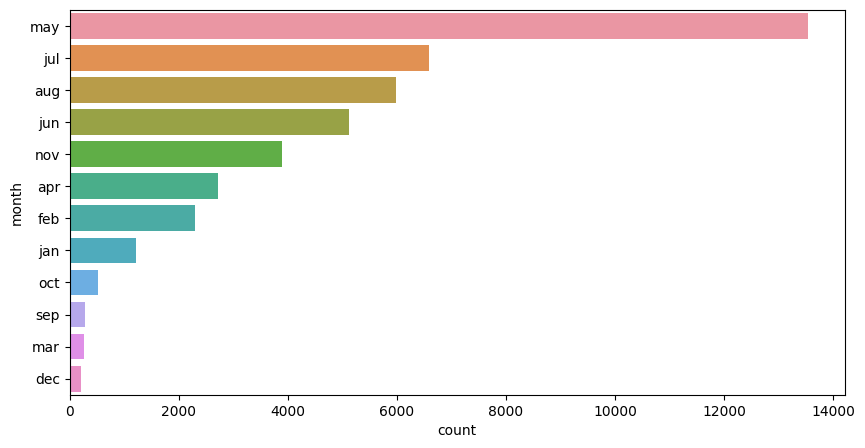


╔════════════════════════════════════════════════════════════╗
║                          POUTCOME                          ║
╚════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════╗
║ There are 4 unique values in POUTCOME column ║
╚══════════════════════════════════════════════╝


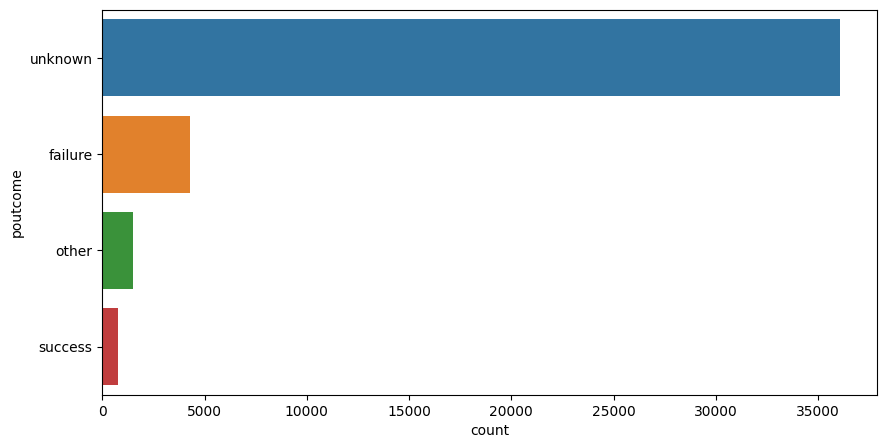


╔════════════════════════════════════════════════════════════════╗
║                          TERM_DEPOSIT                          ║
╚════════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════════╗
║ There are 2 unique values in TERM_DEPOSIT column ║
╚══════════════════════════════════════════════════╝


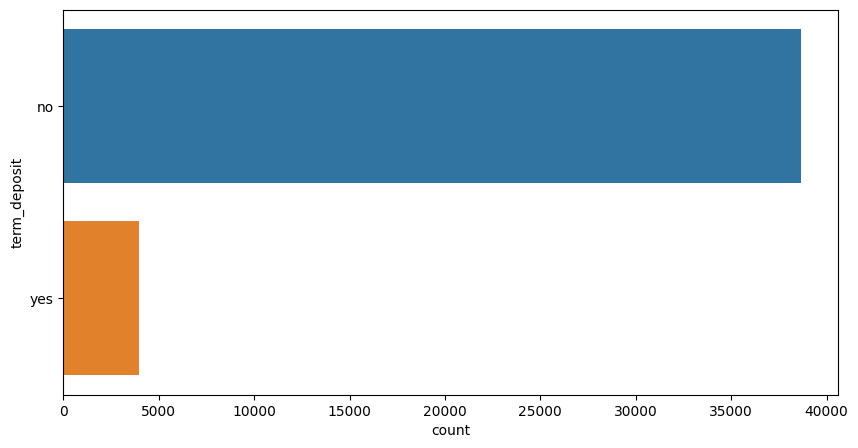

INT TYPE

╔═══════════════════════════════════════════════════════╗
║                          AGE                          ║
╚═══════════════════════════════════════════════════════╝

╔══════════════════════════════════════╗
║ Average value is : 40.78880836792608 ║
╚══════════════════════════════════════╝

╔═══════════════════════╗
║ Minumum value is : 18 ║
╚═══════════════════════╝

╔═══════════════════════╗
║ Maximum value is : 95 ║
╚═══════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located below mean ║
╚════════════════════════════════════════════╝
None


/var/folders/_7/q65t_5bs3653ct73dh3s10w00000gn/T/ipykernel_55689/162119140.py:26: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




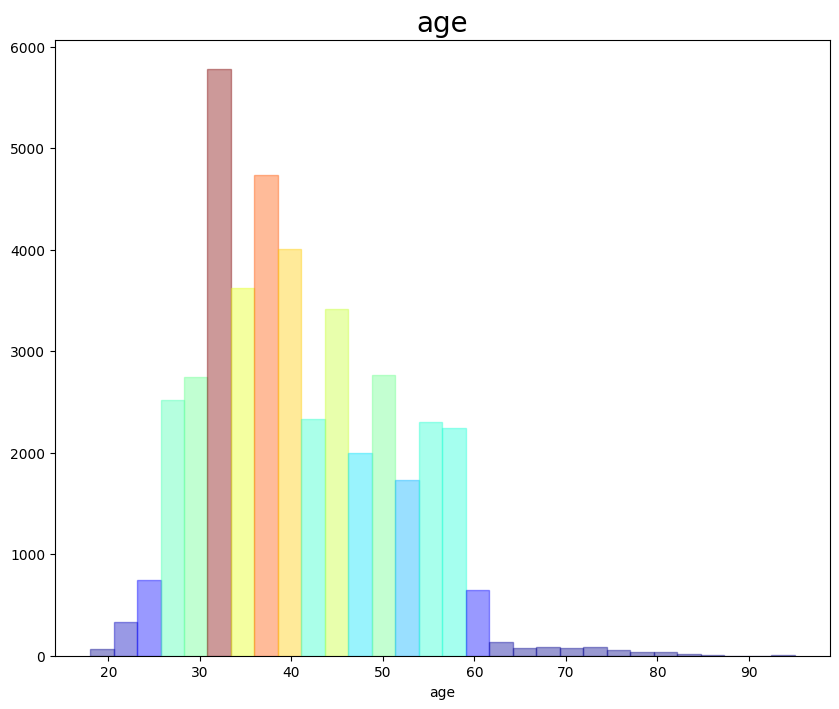


╔═══════════════════════════════════════════════════════════╗
║                          BALANCE                          ║
╚═══════════════════════════════════════════════════════════╝

╔══════════════════════════════════════╗
║ Average value is : 1331.863950843125 ║
╚══════════════════════════════════════╝

╔══════════════════════════╗
║ Minumum value is : -8019 ║
╚══════════════════════════╝

╔═══════════════════════════╗
║ Maximum value is : 102127 ║
╚═══════════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


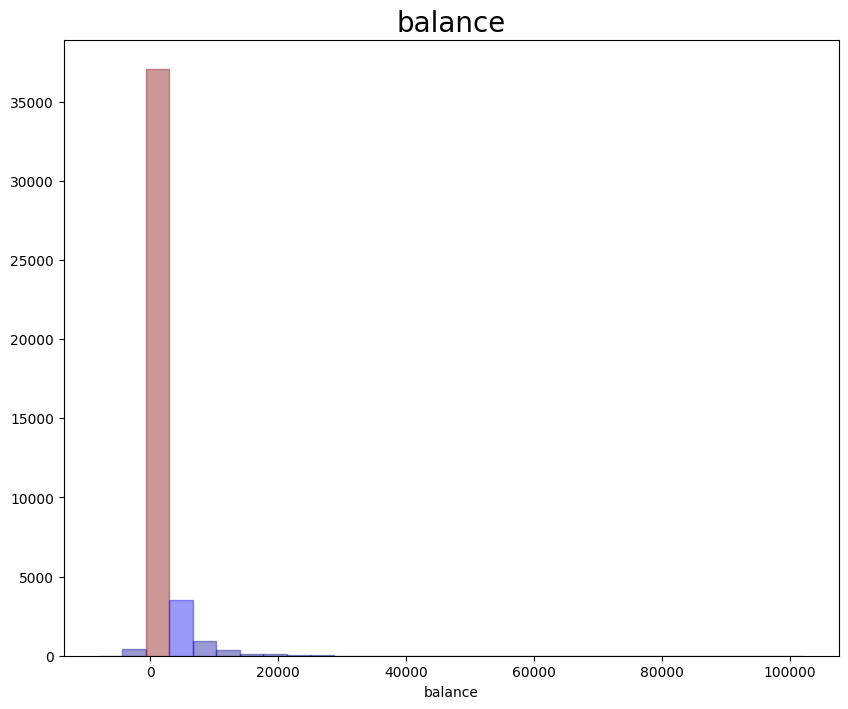


╔═══════════════════════════════════════════════════════╗
║                          DAY                          ║
╚═══════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 15.854780834447338 ║
╚═══════════════════════════════════════╝

╔══════════════════════╗
║ Minumum value is : 1 ║
╚══════════════════════╝

╔═══════════════════════╗
║ Maximum value is : 31 ║
╚═══════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located below mean ║
╚════════════════════════════════════════════╝
None


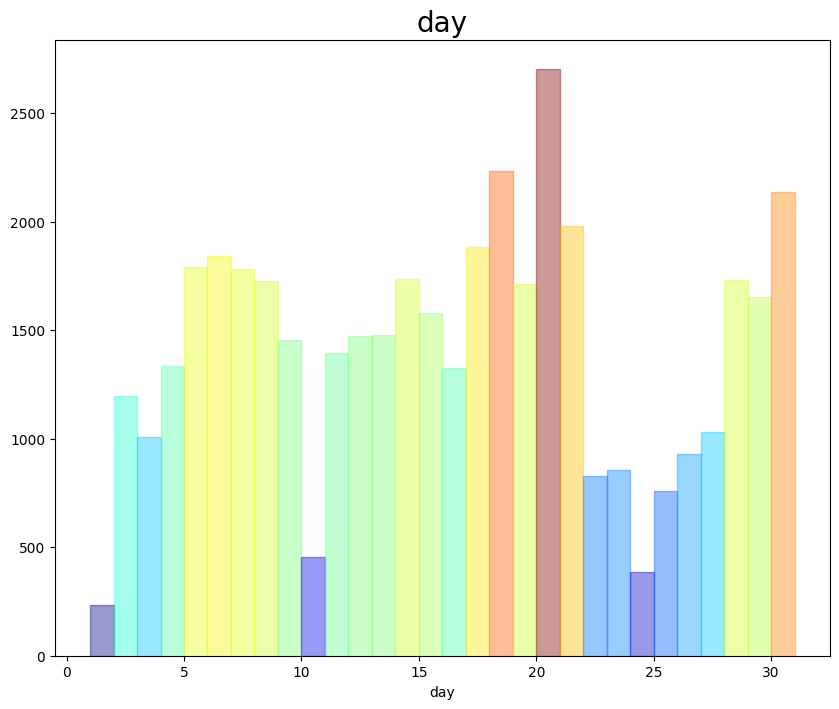


╔════════════════════════════════════════════════════════════╗
║                          DURATION                          ║
╚════════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 255.95750369380144 ║
╚═══════════════════════════════════════╝

╔══════════════════════╗
║ Minumum value is : 0 ║
╚══════════════════════╝

╔═════════════════════════╗
║ Maximum value is : 4918 ║
╚═════════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


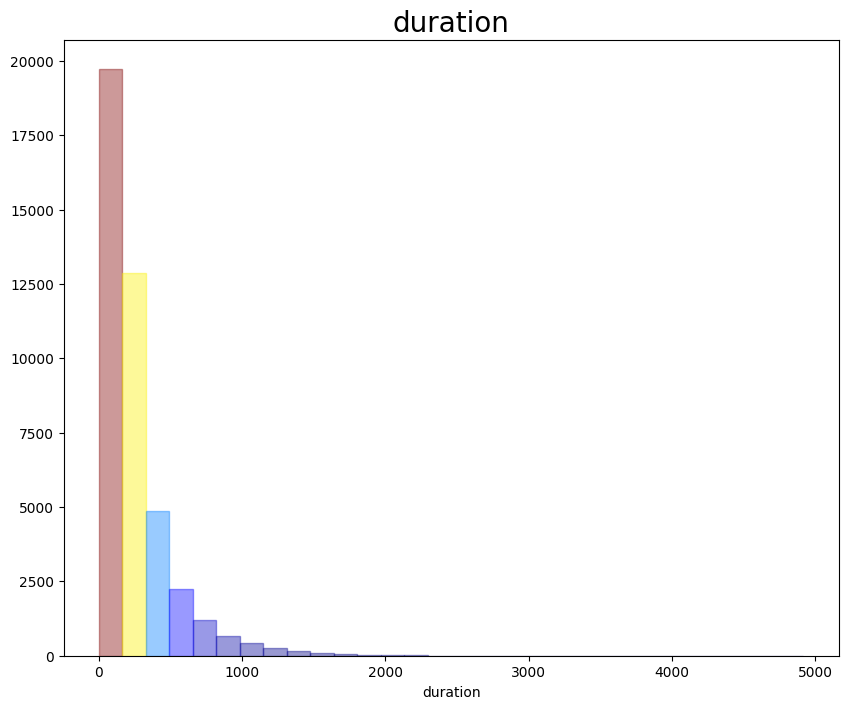


╔════════════════════════════════════════════════════════════╗
║                          CAMPAIGN                          ║
╚════════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 2.8164122047890428 ║
╚═══════════════════════════════════════╝

╔══════════════════════╗
║ Minumum value is : 1 ║
╚══════════════════════╝

╔═══════════════════════╗
║ Maximum value is : 63 ║
╚═══════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


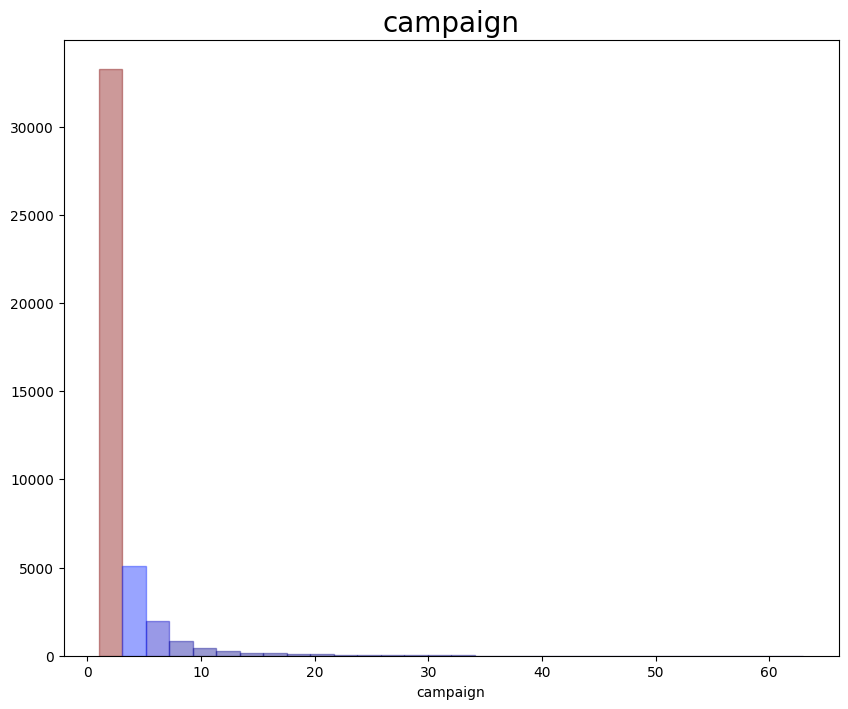


╔═════════════════════════════════════════════════════════╗
║                          PDAYS                          ║
╚═════════════════════════════════════════════════════════╝

╔══════════════════════════════════════╗
║ Average value is : 34.16914092732006 ║
╚══════════════════════════════════════╝

╔═══════════════════════╗
║ Minumum value is : -1 ║
╚═══════════════════════╝

╔════════════════════════╗
║ Maximum value is : 536 ║
╚════════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


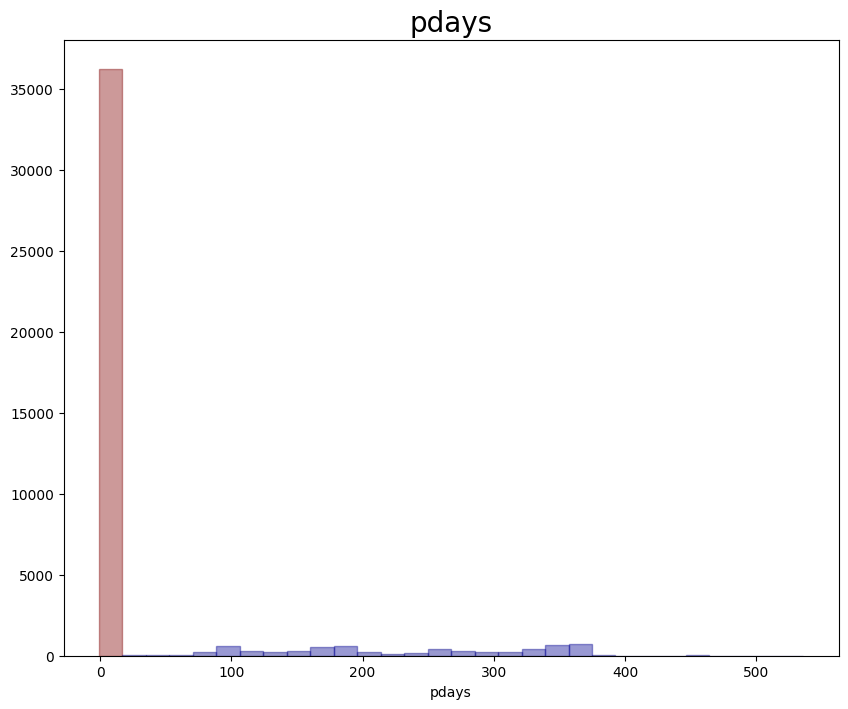


╔════════════════════════════════════════════════════════════╗
║                          PREVIOUS                          ║
╚════════════════════════════════════════════════════════════╝

╔════════════════════════════════════════╗
║ Average value is : 0.46544243532915874 ║
╚════════════════════════════════════════╝

╔══════════════════════╗
║ Minumum value is : 0 ║
╚══════════════════════╝

╔════════════════════════╗
║ Maximum value is : 275 ║
╚════════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


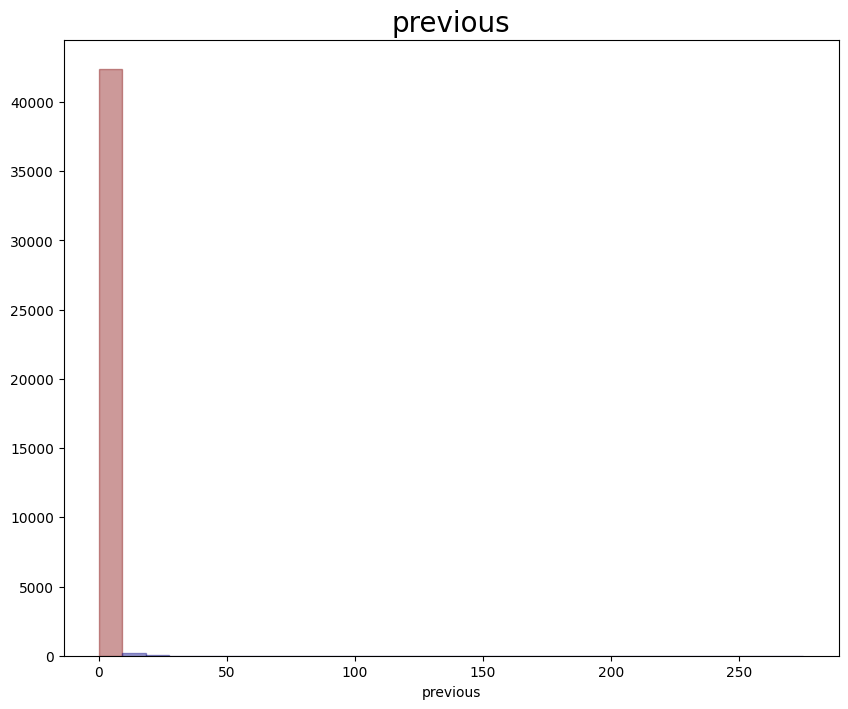

In [7]:
frame = EDA().run(df)

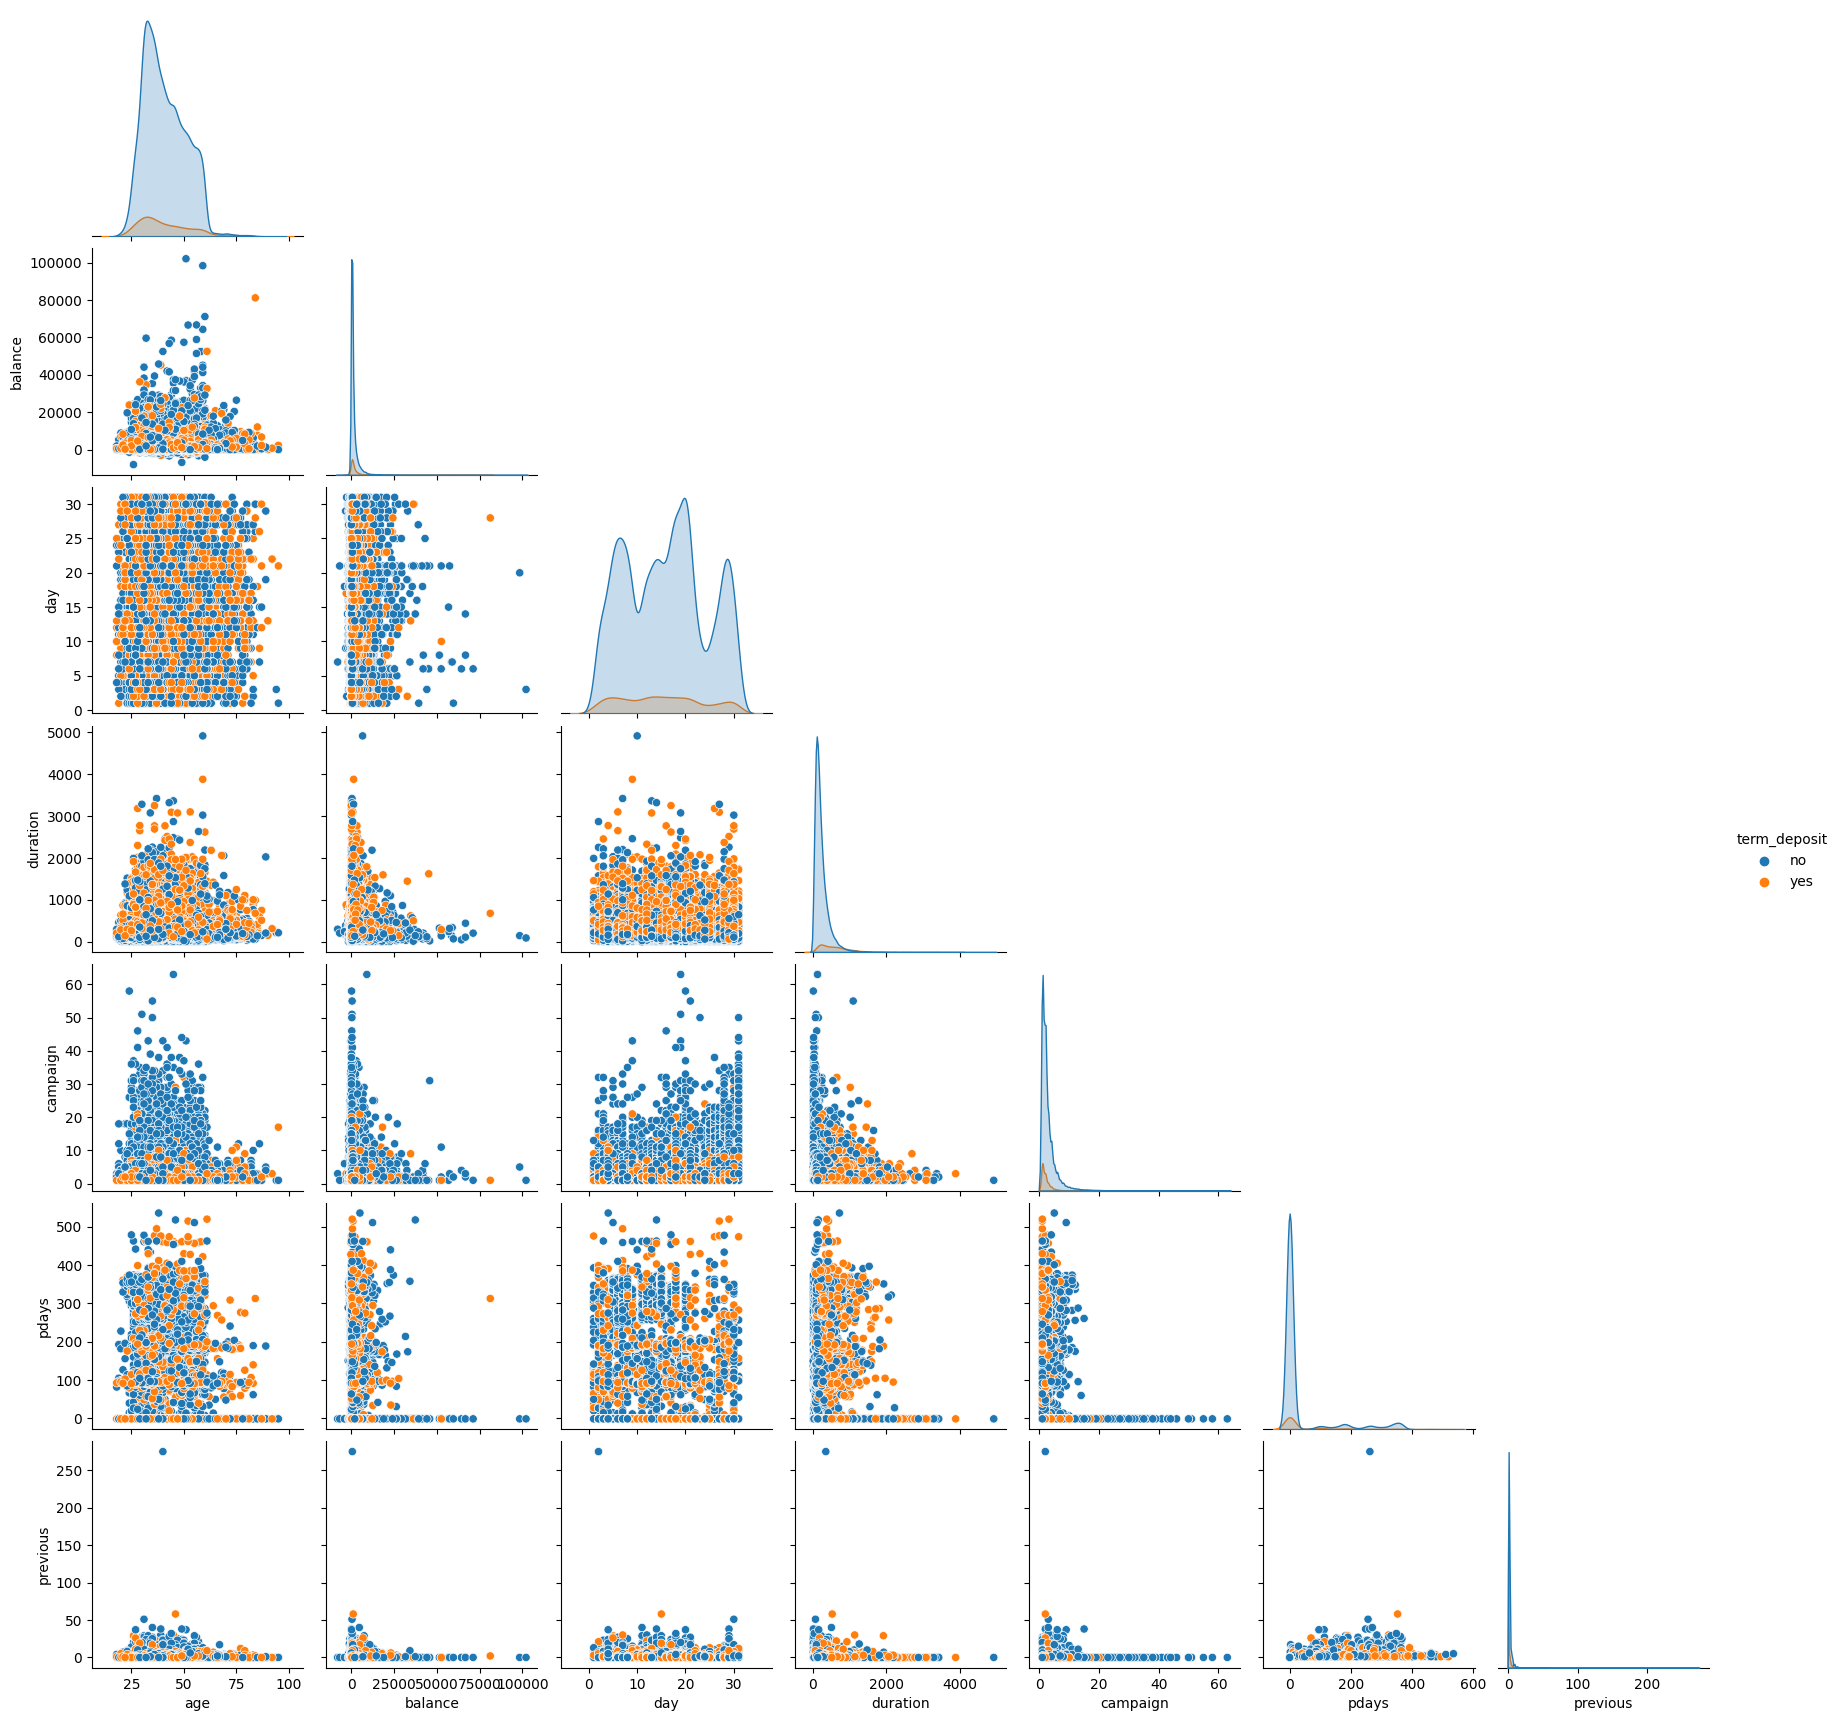

In [8]:
sns.pairplot(df,hue='term_deposit',corner=True)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'balance'),
  Text(0, 2.5, 'day'),
  Text(0, 3.5, 'duration'),
  Text(0, 4.5, 'campaign'),
  Text(0, 5.5, 'pdays'),
  Text(0, 6.5, 'previous')])

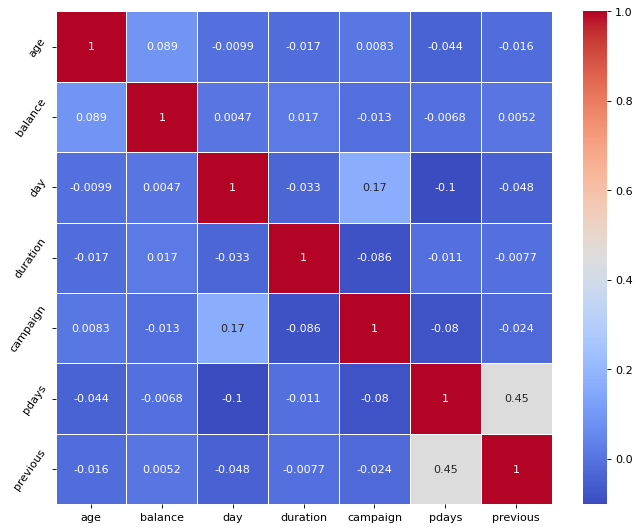

In [9]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,linewidth=0.5)
plt.yticks(rotation=55)

In [10]:
sample  = df.rename(columns={"balance":"Active Balance","job":"Occupation"})
fig = px.treemap(sample, path=[px.Constant('Active Balance'),'Occupation'], values='Active Balance',
                   hover_data=['Occupation'])
fig.show()

In [11]:
management = df[df.job=='management']
fig = px.box(management, x="marital", y="balance",
             color="term_deposit", points="all",
            )
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(
    title={
         'text': "Management behevior on deposit",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    xaxis_title="Martial Status",
    yaxis_title="Active Balance",
    legend_title="Deposit Status",
    font=dict(
        family="Arial",
        size=18,
        color="DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()

In [12]:
technician = df[df.job=='technician']
fig = px.box(technician, x="marital", y="balance",
             color="term_deposit", points="all",
            )
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(
    title={
         'text': "Technician behevior on deposit",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    xaxis_title="Martial Status",
    yaxis_title="Active Balance",
    legend_title="Deposit Status",
    font=dict(
        family="Arial",
        size=18,
        color="DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()

In [13]:
blue = df[df.job=='blue-collar']
fig = px.box(blue, x="marital", y="balance",
             color="term_deposit", points="all",
            )
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(
    title={
         'text': "Blue-Collar behevior on deposit",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    xaxis_title="Martial Status",
    yaxis_title="Active Balance",
    legend_title="Deposit Status",
    font=dict(
        family="Arial",
        size=20,
        color="DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()

In [14]:
blue = df[df.job=='blue-collar']
fig = px.box(blue, x="marital", y="balance",
             color="term_deposit", points="all",
            )
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(
    title={
         'text': "Blue-Collar behevior on deposit",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    xaxis_title="Martial Status",
    yaxis_title="Active Balance",
    legend_title="Deposit Status",
    font=dict(
        family="Arial",
        size=20,
        color="DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()

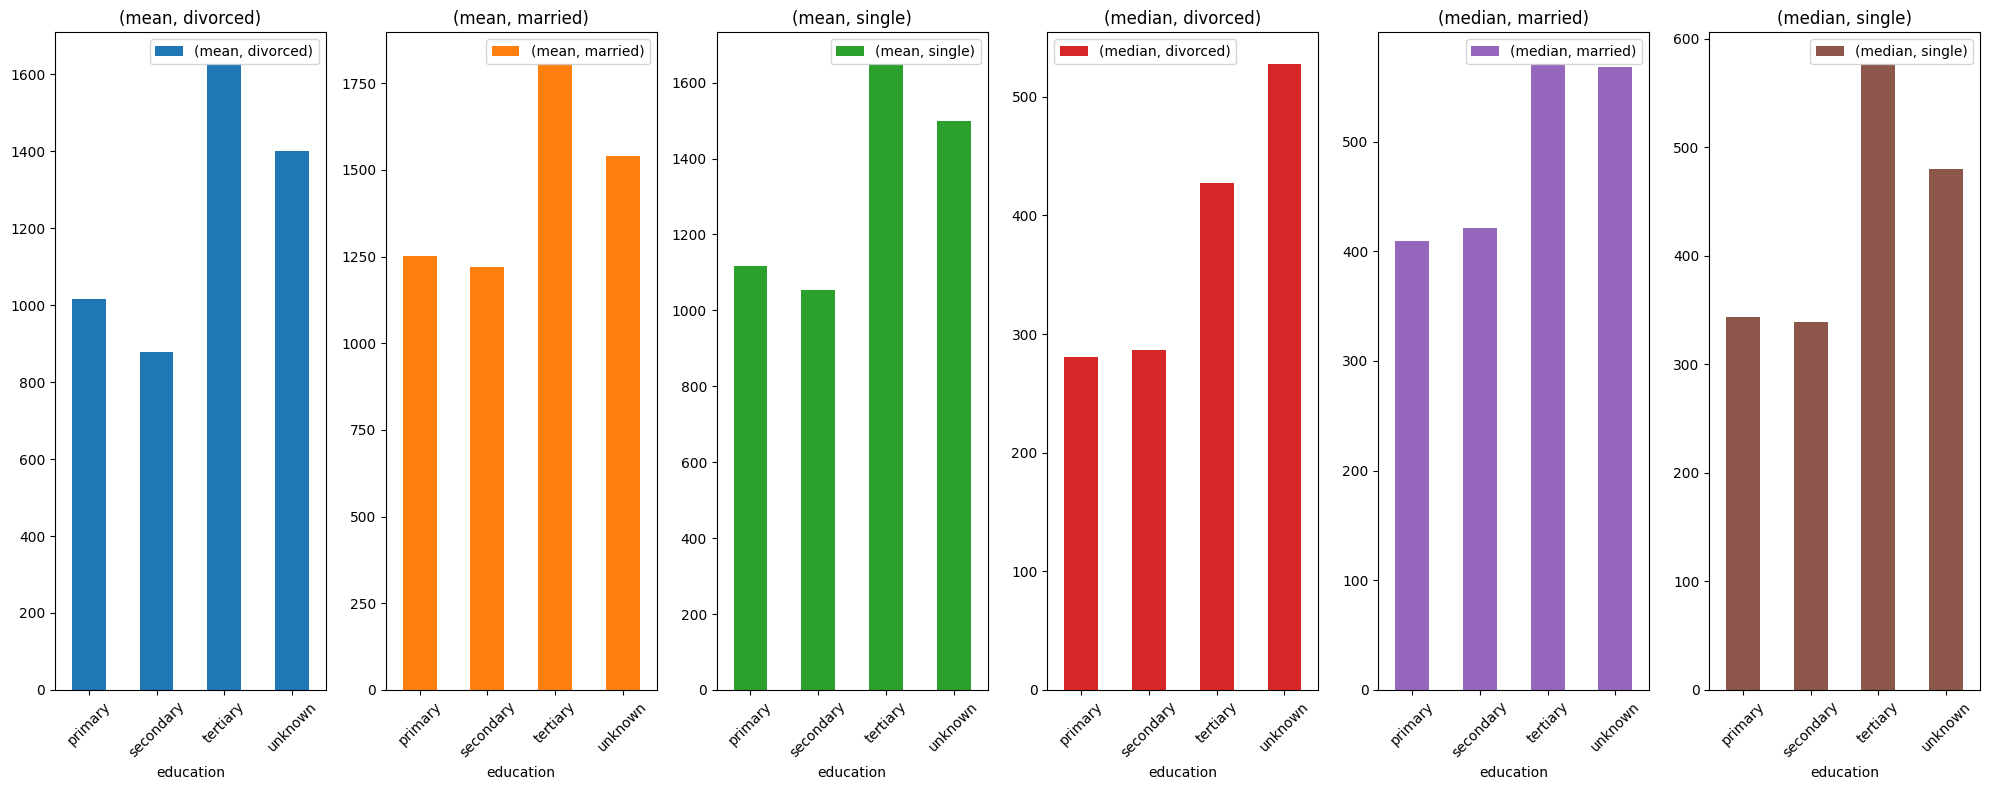

In [15]:
education= df.groupby(['marital','education'], as_index=False)['balance'].agg({np.median,np.mean})
education = round(education,2)

ax = education.unstack(level=0).plot(kind='bar', subplots=True, rot=45, figsize=(20, 8), layout=(1, 6))
plt.tight_layout()

In [16]:
fig = px.scatter(df, x="balance", y="duration", color="marital",
                 marginal_x="box", marginal_y="violin",
                  title="Click on the legend items!")
fig.update_layout(
    title={
         'text': "Purpose Of Low Amount Of Balance.",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    xaxis_title="Duration",
    yaxis_title=" Balance",
    legend_title="Marital Status",
    font=dict(
        family="Arial",
        size=20,
        color="DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()

### stratified sampling

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(df, df["loan"]):
    stratified_train = df.loc[train_set]
    stratified_test = df.loc[test_set]

stratified_train["loan"].value_counts()/len(df)
stratified_test["loan"].value_counts()/len(df)

no    0.167
yes   0.033
Name: loan, dtype: float64

In [18]:
train_data = stratified_train
test_data = stratified_test
train_data.shape, test_data.shape

((34111, 17), (8528, 17))

In [19]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"observations: {dataframe.shape[0]}")
    print(f"variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)


observations: 42639
variables: 17
cat_cols: 10
num_cols: 7
cat_but_car: 0
num_but_cat: 0


In [20]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)

observations: 42639
variables: 17
cat_cols: 10
num_cols: 7
cat_but_car: 0
num_but_cat: 0


In [21]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'term_deposit']

In [22]:
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [23]:
def label_encoder(dataframe, binary_col):
     labelencoder = LabelEncoder()
     dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
     return dataframe

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
                and df[col].nunique() == 2]

for col in binary_cols:
     label_encoder(df, col)

In [24]:
df.head(10)

age           job   marital  education  default  balance  housing  loan  \
0   58    management   married   tertiary        0     2143        1     0   
1   44    technician    single  secondary        0       29        1     0   
2   33  entrepreneur   married  secondary        0        2        1     1   
3   47   blue-collar   married    unknown        0     1506        1     0   
4   33       unknown    single    unknown        0        1        0     0   
5   35    management   married   tertiary        0      231        1     0   
6   28    management    single   tertiary        0      447        1     1   
7   42  entrepreneur  divorced   tertiary        1        2        1     0   
8   58       retired   married    primary        0      121        1     0   
9   43    technician    single  secondary        0      593        1     0   

   contact  day month  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may       261         1     -1         0  unknown   
1  unknown    5   may       151         1     -1         0  unknown   
2  unknown    5   may        76         1     -1         0  unknown   
3  unknown    5   may        92         1     -1         0  unknown   
4  unknown    5   may       198         1     -1         0  unknown   
5  unknown    5   may       139         1     -1         0  unknown   
6  unknown    5   may       217         1     -1         0  unknown   
7  unknown    5   may       380         1     -1         0  unknown   
8  unknown    5   may        50         1     -1         0  unknown   
9  unknown    5   may        55         1     -1         0  unknown   

   term_deposit  
0             0  
1             0  
2             0  
3             0  
4             0  
5             0  
6             0  
7             0  
8             0  
9             0

In [25]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [26]:
df.head(10)

age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   58     2143    5       261         1     -1         0                0   
1   44       29    5       151         1     -1         0                0   
2   33        2    5        76         1     -1         0                0   
3   47     1506    5        92         1     -1         0                1   
4   33        1    5       198         1     -1         0                0   
5   35      231    5       139         1     -1         0                0   
6   28      447    5       217         1     -1         0                0   
7   42        2    5       380         1     -1         0                0   
8   58      121    5        50         1     -1         0                0   
9   43      593    5        55         1     -1         0                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              0               1            0   
1                 0              0               0            0   
2                 1              0               0            0   
3                 0              0               0            0   
4                 0              0               0            0   
5                 0              0               1            0   
6                 0              0               1            0   
7                 1              0               0            0   
8                 0              0               0            1   
9                 0              0               0            0   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               0   
1                  0             0            0               1   
2                  0             0            0               0   
3                  0             0            0               0   
4                  0             0            0               0   
5                  0             0            0               0   
6                  0             0            0               0   
7                  0             0            0               0   
8                  0             0            0               0   
9                  0             0            0               1   

   job_unemployed  job_unknown  marital_married  marital_single  \
0               0            0                1               0   
1               0            0                0               1   
2               0            0                1               0   
3               0            0                1               0   
4               0            1                0               1   
5               0            0                1               0   
6               0            0                0               1   
7               0            0                0               0   
8               0            0                1               0   
9               0            0                0               1   

   education_secondary  education_tertiary  education_unknown  default_1  \
0                    0                   1                  0          0   
1                    1                   0                  0          0   
2                    1                   0                  0          0   
3                    0                   0                  1          0   
4                    0                   0                  1          0   
5                    0                   1                  0          0   
6                    0                   1                  0          0   
7                    0                   1                  0          1   
8                    0                   0                  0          0   
9                    1                   0                  0          0   

   housing_1  loan_1  contact_telephone  contact_unknown  month_aug  \
0          1       0  

In [27]:
# MinMaxScaler is used because negative values are also available.
scaler = MinMaxScaler()
df["balance"] = scaler.fit_transform(df[['balance']])


standart_scaler = StandardScaler()
df["age"] = standart_scaler.fit_transform(df[['age']])

In [28]:
df.head(10)

age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0  1.687    0.092    5       261         1     -1         0                0   
1  0.315    0.073    5       151         1     -1         0                0   
2 -0.764    0.073    5        76         1     -1         0                0   
3  0.609    0.086    5        92         1     -1         0                1   
4 -0.764    0.073    5       198         1     -1         0                0   
5 -0.568    0.075    5       139         1     -1         0                0   
6 -1.254    0.077    5       217         1     -1         0                0   
7  0.119    0.073    5       380         1     -1         0                0   
8  1.687    0.074    5        50         1     -1         0                0   
9  0.217    0.078    5        55         1     -1         0                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              0               1            0   
1                 0              0               0            0   
2                 1              0               0            0   
3                 0              0               0            0   
4                 0              0               0            0   
5                 0              0               1            0   
6                 0              0               1            0   
7                 1              0               0            0   
8                 0              0               0            1   
9                 0              0               0            0   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               0   
1                  0             0            0               1   
2                  0             0            0               0   
3                  0             0            0               0   
4                  0             0            0               0   
5                  0             0            0               0   
6                  0             0            0               0   
7                  0             0            0               0   
8                  0             0            0               0   
9                  0             0            0               1   

   job_unemployed  job_unknown  marital_married  marital_single  \
0               0            0                1               0   
1               0            0                0               1   
2               0            0                1               0   
3               0            0                1               0   
4               0            1                0               1   
5               0            0                1               0   
6               0            0                0               1   
7               0            0                0               0   
8               0            0                1               0   
9               0            0                0               1   

   education_secondary  education_tertiary  education_unknown  default_1  \
0                    0                   1                  0          0   
1                    1                   0                  0          0   
2                    1                   0                  0          0   
3                    0                   0                  1          0   
4                    0                   0                  1          0   
5                    0                   1                  0          0   
6                    0                   1                  0          0   
7                    0                   1                  0          1   
8                    0                   0                  0          0   
9                    1                   0                  0          0   

   housing_1  loan_1  contact_telephone  contact_unknown  month_aug  \
0 

In [29]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_1', 'housing_1',
       'loan_1', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'term_deposit_1'],
      dtype='object')

In [30]:
# Split data into features and target

X = df.drop('term_deposit_1', axis=1)
y = df['term_deposit_1']


In [31]:
X.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_1', 'housing_1',
       'loan_1', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [32]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [34]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print('the accuracy score of decision tree classifier is: ', accuracy_score(y_test, pred))



the accuracy score of decision tree classifier is:  0.890556597873671


### Grid CV search

In [35]:
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator
             }

In [36]:
tune_model = GridSearchCV(DecisionTreeClassifier(), 
                          param_grid=param_grid, 
                          scoring = 'roc_auc',
                          cv = 5,
                          verbose=0)
tune_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'max_features': [None, 'auto'],
                         'min_samples_leaf': [1, 5, 10, 0.03, 0.05],
                         'min_samples_split': [2, 5, 10, 0.03, 0.05],
                         'random_state': [0], 'splitter': ['best', 'random']},
             scoring='roc_auc')

In [37]:
print('\033[1m'+'Decision Tree Parameters:{} '.format(tune_model.best_params_))

Decision Tree Parameters:{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 0.03, 'random_state': 0, 'splitter': 'best'} 


In [38]:
dt_tuned =  DecisionTreeClassifier(criterion='entropy',
                                   min_samples_split=0.03,
                                   max_depth=None,
                                    max_features = None,
                                   min_samples_leaf=1,
                                   random_state = 0,
                                   splitter='best')

dt_tuned.fit(X_train,y_train)
pred = dt_tuned.predict(X_test)
print('the accuracy score of decision tree classifier is: ', accuracy_score(y_test, pred))

the accuracy score of decision tree classifier is:  0.9098655409631019


### Classification report 

In [39]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11553
           1       0.58      0.25      0.35      1239

    accuracy                           0.91     12792
   macro avg       0.75      0.62      0.65     12792
weighted avg       0.89      0.91      0.89     12792



In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[11328   225]
 [  928   311]]

True Positives(TP) =  11328

True Negatives(TN) =  311

False Positives(FP) =  225

False Negatives(FN) =  928


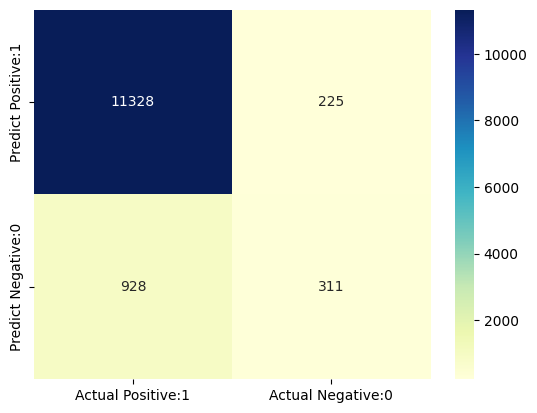

In [41]:

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.show()

In [42]:
# y_train.head(10)

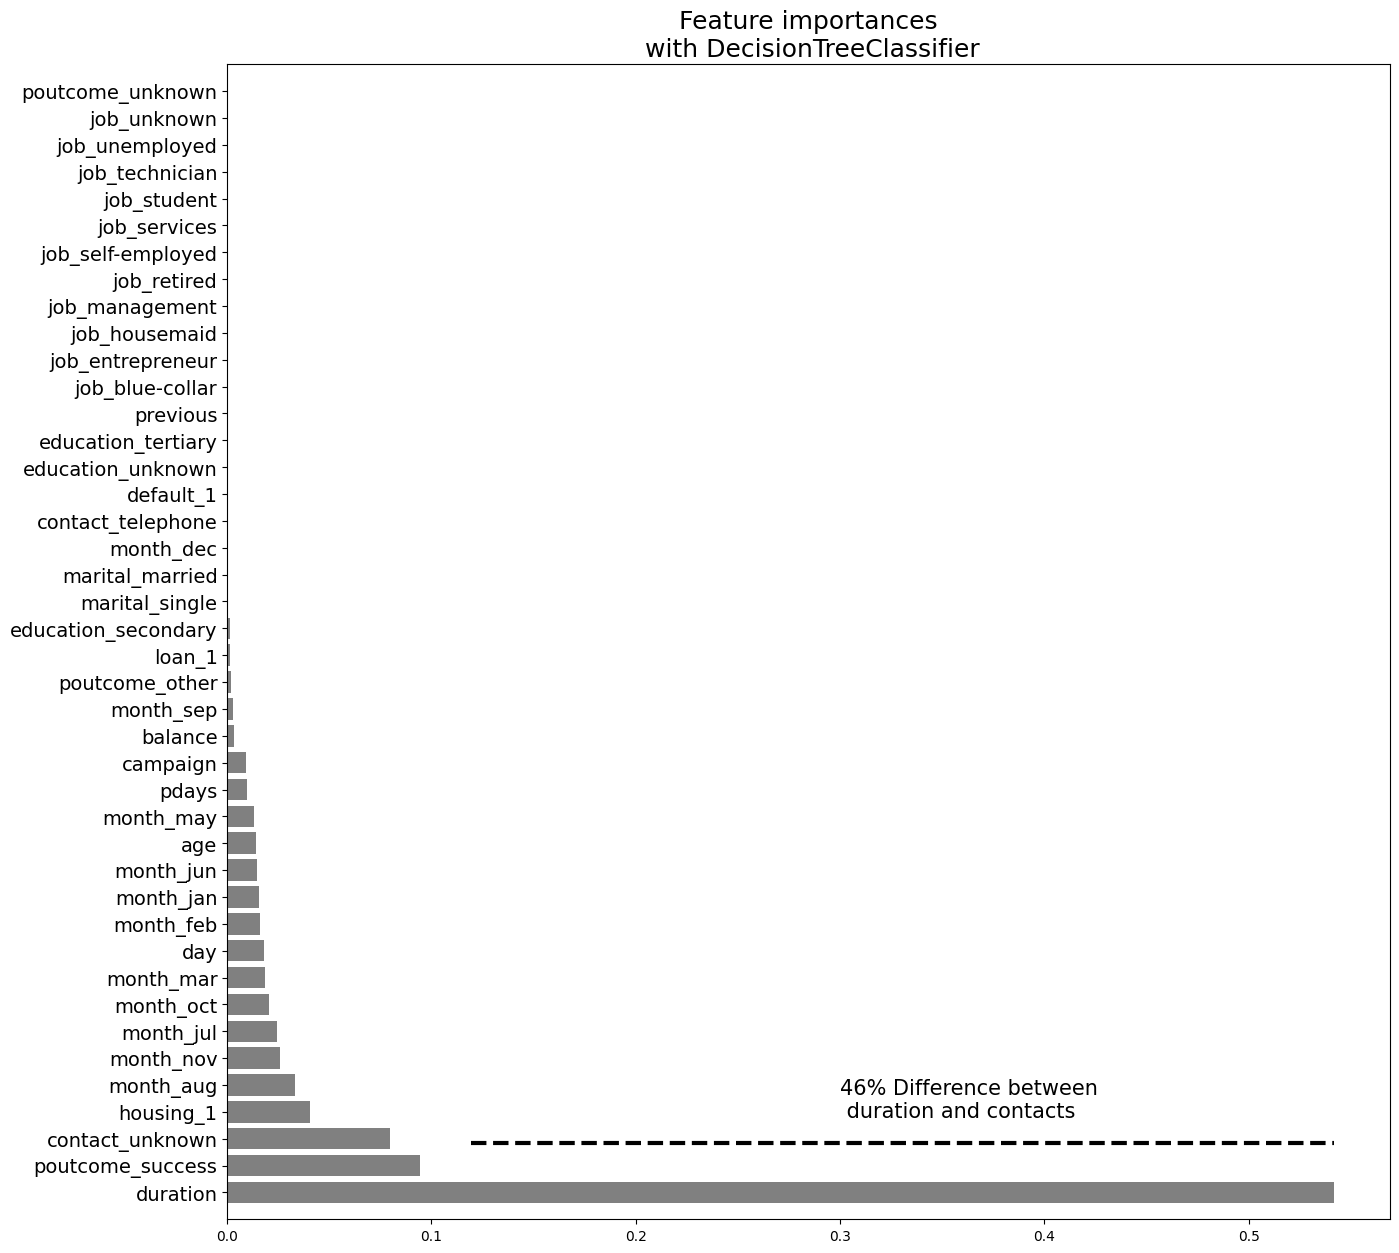

In [43]:
tree_model = dt_tuned.fit(X_train, y_train)
importances = tree_model.feature_importances_
feature_names = df.drop('term_deposit_1', axis=1).columns
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(15,15))
    plt.title(" Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='grey',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
    plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)

feature_importance_graph(indices, importances, feature_names)
plt.show()

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


import matplotlib.pyplot as plt
accuracy_list_train = []
k=np.arange(1,17,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(X_train, y_train)
    dt.fit(x_new,y_train)
    accuracy_list_train.append(dt.score(x_new,y_train))   


d = {'best features number': k, 'train_score': accuracy_list_train}
df = pd.DataFrame(data=d)
print("max accuracy:",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())

max accuracy: 0.9899822427714678
max accuracy id: 15


In [45]:
print(" max accuracy values: \n", df.iloc[4])

 max accuracy values: 
 best features number   5.000
train_score            0.943
Name: 4, dtype: float64


In [46]:
selector = SelectKBest(f_classif, k = 5)
x_new = selector.fit_transform(X_train, y_train)
x_new_test=selector.fit_transform(X_test,y_test)
names_train = X_train.columns.values[selector.get_support()]
names_test = X_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)



# random forestt use 

x train features: ['duration' 'contact_unknown' 'month_oct' 'month_sep' 'poutcome_success']
x test features: ['duration' 'contact_unknown' 'month_oct' 'month_sep' 'poutcome_success']


In [47]:
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator
             }

In [48]:
tune_model = GridSearchCV(DecisionTreeClassifier(), 
                          param_grid=param_grid, 
                          scoring = 'roc_auc',
                          cv = 5,
                          verbose=0)
tune_model.fit(x_new, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'max_features': [None, 'auto'],
                         'min_samples_leaf': [1, 5, 10, 0.03, 0.05],
                         'min_samples_split': [2, 5, 10, 0.03, 0.05],
                         'random_state': [0], 'splitter': ['best', 'random']},
             scoring='roc_auc')

In [49]:
print('\033[1m'+'Decision Tree Parameters:{} '.format(tune_model.best_params_))

Decision Tree Parameters:{'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 0.03, 'random_state': 0, 'splitter': 'best'} 


In [50]:
dt_tuned =  DecisionTreeClassifier(criterion='entropy', 
                                   min_samples_split=0.03,
                                   max_depth=None,
                                    max_features = None,
                                   min_samples_leaf=5,
                                   random_state = 0,
                                   splitter='random')

dt_tuned.fit(x_new,y_train)
pred = dt_tuned.predict(x_new_test)
print('the accuracy score of decision tree classifier is: ', accuracy_score(y_test, pred))

the accuracy score of decision tree classifier is:  0.9093183239524703


In [51]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, x_new, y_train, cv=3)
tree_mean = tree_scores.mean()


In [58]:

# Create a Dataframe with the results.
d = {'Classifiers': [ 'Dec Tree'], 
    'Crossval Mean Scores': [ tree_mean]}

result_df = pd.DataFrame(data=d)

In [59]:
# All our models perform well but I will go with GradientBoosting.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

Classifiers  Crossval Mean Scores
0    Dec Tree                 0.909

In [52]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     11553
           1       0.56      0.28      0.38      1239

    accuracy                           0.91     12792
   macro avg       0.75      0.63      0.66     12792
weighted avg       0.89      0.91      0.90     12792



In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[11280   273]
 [  887   352]]

True Positives(TP) =  11280

True Negatives(TN) =  352

False Positives(FP) =  273

False Negatives(FN) =  887


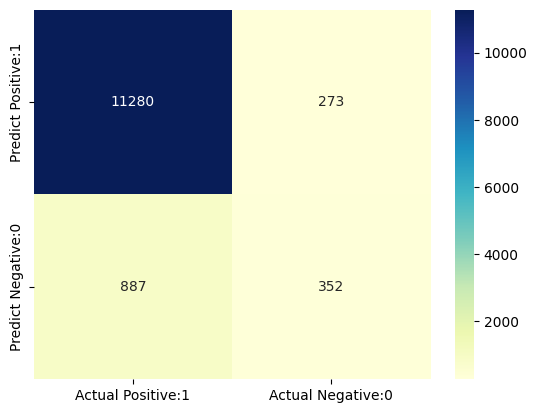

In [54]:

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.show()

In [55]:

from sklearn.metrics import *
y_scores = dt_tuned.predict_proba(x_new)

if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
    
precisions, recalls, threshold = precision_recall_curve(y_train, y_scores,)

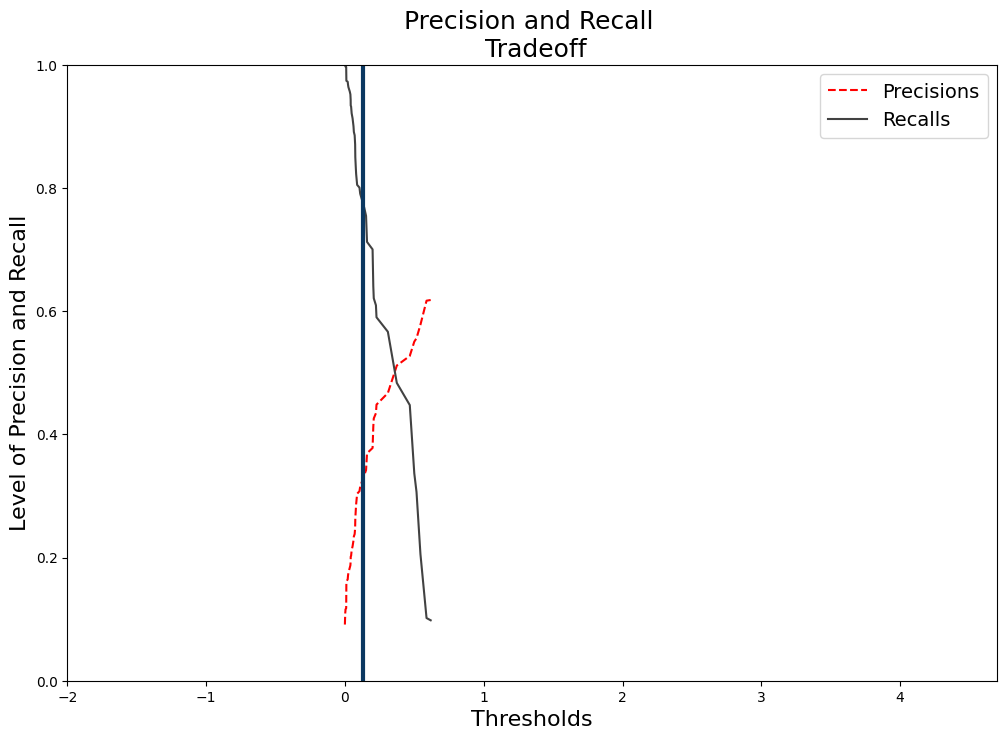

In [56]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.13, linewidth=3, color="#0B3861")
    # plt.annotate('Best Precision and \n Recall Balance \n is at 0.13 \n threshold ', xy=(0.13, 0.83), xytext=(55, -40),
    #          textcoords="offset points",
    #         arrowprops=dict(facecolor='black', shrink=0.05),
    #             fontsize=12, 
    #             color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()

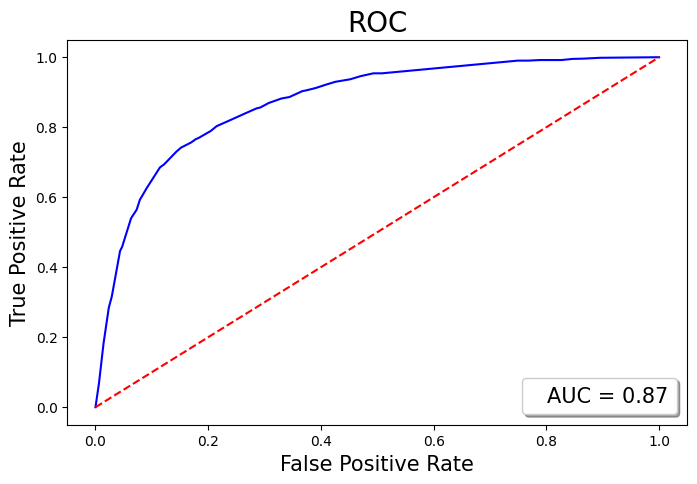

In [60]:
plt.figure(figsize = (8, 5))

probs = dt_tuned.predict_proba(x_new_test)
preds = probs[:,1]
fprxgb, tprxgb, _ = roc_curve(y_test, preds)
roc_aucxgb = auc(fprxgb, tprxgb)

plt.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0)
plt.show()

### Notes